In [26]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import Ridge,Lasso,LinearRegression
from sklearn import datasets

In [4]:
boston = datasets.load_boston()
train = DataFrame(data=boston.data,columns=boston.feature_names)
target = boston.target

In [33]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [5]:
# 样本数量 < 样本特征
# 多重共线性
train.shape

(506, 13)

In [6]:
train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
# 因为数据存在不同的量级，所以先采用比值的方式，把所有数据的量级进行统一
train = train/train.sum()

In [8]:
train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000003,0.003130,0.000410,0.0,0.001917,0.002068,0.001879,0.002130,0.000207,0.001433,0.001638,0.002199,0.000778
1,0.000015,0.000000,0.001255,0.0,0.001671,0.002019,0.002274,0.002587,0.000414,0.001172,0.001906,0.002199,0.001428
2,0.000015,0.000000,0.001255,0.0,0.001671,0.002259,0.001761,0.002587,0.000414,0.001172,0.001906,0.002177,0.000629
3,0.000018,0.000000,0.000387,0.0,0.001632,0.002201,0.001320,0.003157,0.000621,0.001075,0.002002,0.002187,0.000459
4,0.000038,0.000000,0.000387,0.0,0.001632,0.002247,0.001562,0.003157,0.000621,0.001075,0.002002,0.002199,0.000832
5,0.000016,0.000000,0.000387,0.0,0.001632,0.002022,0.001692,0.003157,0.000621,0.001075,0.002002,0.002184,0.000814
6,0.000049,0.002174,0.001397,0.0,0.001867,0.001891,0.001919,0.002896,0.001035,0.001506,0.001628,0.002192,0.001941
7,0.000079,0.002174,0.001397,0.0,0.001867,0.001941,0.002770,0.003099,0.001035,0.001506,0.001628,0.002199,0.002991
8,0.000116,0.002174,0.001397,0.0,0.001867,0.001771,0.002882,0.003167,0.001035,0.001506,0.001628,0.002142,0.004675
9,0.000094,0.002174,0.001397,0.0,0.001867,0.001888,0.002476,0.003433,0.001035,0.001506,0.001628,0.002143,0.002671


In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train,target,test_size=0.2,random_state=1)

In [30]:
# alpha 惩罚系数
# 越大，惩罚力度越小，原始系数的影响就越小
# 越小，惩罚力度越大，原始蜥属的影响就越大

lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
display(lasso.coef_)
y_ = lasso.predict(X_test)

array([-0.,  0., -0.,  0., -0.,  0., -0.,  0., -0., -0., -0.,  0., -0.])

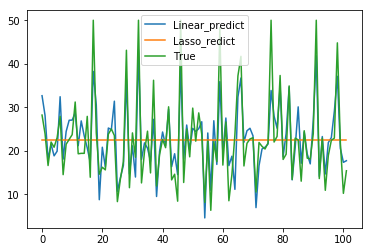

In [31]:
linear = LinearRegression()
linear.fit(X_train,y_train)
y1_ = linear.predict(X_test)

plt.plot(y1_,label='Linear_predict')
plt.plot(y_,label='Lasso_redict')
plt.plot(y_test,label='True')
plt.legend()

In [ ]:
# 把波士顿房价信息转换成分类模型

In [32]:
target.max(),target.min(),target.mean()

(50.0, 5.0, 22.532806324110677)

In [35]:
def transform_price(x):
    if x >= 25:
        return 1
    else:
        return 0
    
target1 = Series(target).map(transform_price)

In [36]:
target1

0      0
1      0
2      1
3      1
4      1
5      1
6      0
7      1
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
476    0
477    0
478    0
479    0
480    0
481    0
482    1
483    0
484    0
485    0
486    0
487    0
488    0
489    0
490    0
491    0
492    0
493    0
494    0
495    0
496    0
497    0
498    0
499    0
500    0
501    0
502    0
503    0
504    0
505    0
Length: 506, dtype: int64

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(train,target1,test_size=0.2,random_state=1)

In [66]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train1,y_train1)
y1_ = knn.predict(X_test1)

In [41]:
y1_

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [67]:
# 在训练集上表现特别好，而在测试集上表现得差距很大，病态
y2_ = knn.predict(X_train1)
(y2_ == y_train1).sum()/y2_.size

0.8737623762376238

In [68]:
(y_test1 == y1_).sum()/y_.size

0.8431372549019608